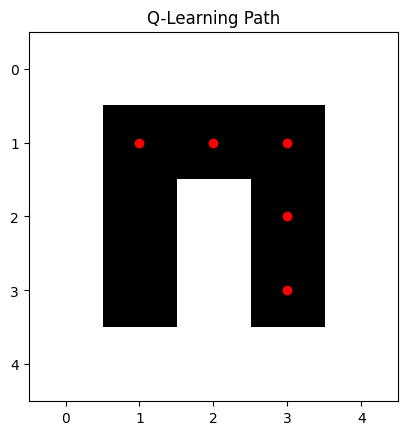

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 미로 설정 (0은 이동 가능, 1은 벽)
maze = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 1, 1, 1, 1]
])

# 출발점과 도착점 설정
start = (1, 1)
goal = (3, 3)

# Q-learning 파라미터
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.9
max_episodes = 500

# 행동 정의 (상, 하, 좌, 우)
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
num_actions = len(actions)

# Q-테이블 초기화
q_table = np.zeros((*maze.shape, num_actions))

# 보상 테이블 설정
rewards = np.full(maze.shape, -1)  # 기본 보상 -1
rewards[goal] = 100  # 목표 지점 보상

# Q-Learning 알고리즘
def train_q_learning():
    for episode in range(max_episodes):
        state = start
        while state != goal:
            if np.random.rand() < epsilon:
                # Exploration
                action_index = np.random.choice(num_actions)
            else:
                # Exploitation
                action_index = np.argmax(q_table[state])

            action = actions[action_index]
            next_state = (state[0] + action[0], state[1] + action[1])

            # 벽이거나 미로 범위를 벗어나면 제자리
            if maze[next_state] == 1:
                next_state = state

            # Q값 업데이트
            reward = rewards[next_state]
            q_table[state][action_index] += learning_rate * (
                reward + discount_factor * np.max(q_table[next_state]) - q_table[state][action_index]
            )

            state = next_state

def visualize_path():
    state = start
    path = [state]

    while state != goal:
        action_index = np.argmax(q_table[state])
        action = actions[action_index]
        next_state = (state[0] + action[0], state[1] + action[1])

        if maze[next_state] == 1:
            break

        path.append(next_state)
        state = next_state

    # 미로 시각화
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap='gray')

    for (y, x) in path:
        plt.plot(x, y, 'ro')  # 경로 표시

    plt.title('Q-Learning Path')
    plt.show()

# 학습 및 결과 시각화
train_q_learning()
visualize_path()


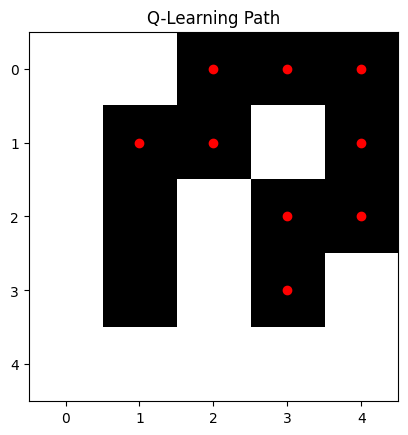

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 미로 설정 (0은 이동 가능, 1은 벽)
maze = np.array([
    [1, 1, 0, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [1, 0, 1, 0, 1],
    [1, 1, 1, 1, 1]
])

# 출발점과 도착점 설정
start = (1, 1)
goal = (3, 3)

# Q-learning 파라미터
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.9
max_episodes = 500

# 행동 정의 (상, 하, 좌, 우)
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
num_actions = len(actions)

# Q-테이블 초기화
q_table = np.zeros((*maze.shape, num_actions))

# 보상 테이블 설정
rewards = np.full(maze.shape, -1)  # 기본 보상 -1
rewards[goal] = 100  # 목표 지점 보상

# Q-Learning 알고리즘
def train_q_learning():
    for episode in range(max_episodes):
        state = start
        while state != goal:
            if np.random.rand() < epsilon:
                # Exploration
                action_index = np.random.choice(num_actions)
            else:
                # Exploitation
                action_index = np.argmax(q_table[state])

            action = actions[action_index]
            next_state = (state[0] + action[0], state[1] + action[1])

            # 벽이거나 미로 범위를 벗어나면 제자리
            if next_state[0] < 0 or next_state[0] >= maze.shape[0] or next_state[1] < 0 or next_state[1] >= maze.shape[1] or maze[next_state] == 1:
                next_state = state

            # Q값 업데이트
            reward = rewards[next_state]
            q_table[state][action_index] += learning_rate * (
                reward + discount_factor * np.max(q_table[next_state]) - q_table[state][action_index]
            )

            state = next_state

def visualize_path():
    state = start
    path = [state]

    while state != goal:
        action_index = np.argmax(q_table[state])
        action = actions[action_index]
        next_state = (state[0] + action[0], state[1] + action[1])

        if next_state[0] < 0 or next_state[0] >= maze.shape[0] or next_state[1] < 0 or next_state[1] >= maze.shape[1] or maze[next_state] == 1:
            break

        path.append(next_state)
        state = next_state

    # 미로 시각화
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap='gray')

    for (y, x) in path:
        plt.plot(x, y, 'ro')  # 경로 표시

    plt.title('Q-Learning Path')
    plt.show()

# 학습 및 결과 시각화
train_q_learning()
visualize_path()


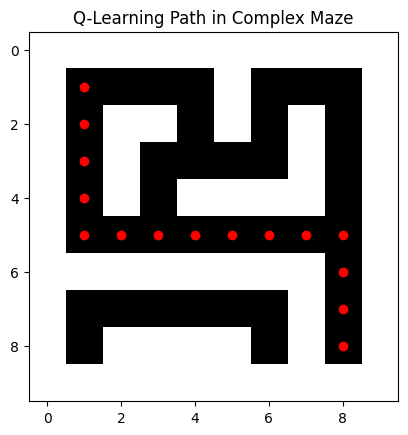

In [4]:
# 더 복잡한 미로 설정 (0은 이동 가능, 1은 벽)
complex_maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# 출발점과 도착점 설정
complex_start = (1, 1)
complex_goal = (8, 8)

# Q-테이블 초기화
complex_q_table = np.zeros((*complex_maze.shape, num_actions))

# 보상 테이블 설정
complex_rewards = np.full(complex_maze.shape, -1)  # 기본 보상 -1
complex_rewards[complex_goal] = 100  # 목표 지점 보상

# Q-Learning 알고리즘
def train_complex_q_learning():
    for episode in range(max_episodes):
        state = complex_start
        while state != complex_goal:
            if np.random.rand() < epsilon:
                # Exploration
                action_index = np.random.choice(num_actions)
            else:
                # Exploitation
                action_index = np.argmax(complex_q_table[state])

            action = actions[action_index]
            next_state = (state[0] + action[0], state[1] + action[1])

            # 벽이거나 미로 범위를 벗어나면 제자리
            if next_state[0] < 0 or next_state[0] >= complex_maze.shape[0] or next_state[1] < 0 or next_state[1] >= complex_maze.shape[1] or complex_maze[next_state] == 1:
                next_state = state

            # Q값 업데이트
            reward = complex_rewards[next_state]
            complex_q_table[state][action_index] += learning_rate * (
                reward + discount_factor * np.max(complex_q_table[next_state]) - complex_q_table[state][action_index]
            )

            state = next_state

def visualize_complex_path():
    state = complex_start
    path = [state]

    while state != complex_goal:
        action_index = np.argmax(complex_q_table[state])
        action = actions[action_index]
        next_state = (state[0] + action[0], state[1] + action[1])

        if next_state[0] < 0 or next_state[0] >= complex_maze.shape[0] or next_state[1] < 0 or next_state[1] >= complex_maze.shape[1] or complex_maze[next_state] == 1:
            break

        path.append(next_state)
        state = next_state

    # 미로 시각화
    fig, ax = plt.subplots()
    ax.imshow(complex_maze, cmap='gray')

    for (y, x) in path:
        plt.plot(x, y, 'ro')  # 경로 표시

    plt.title('Q-Learning Path in Complex Maze')
    plt.show()

# 학습 및 결과 시각화
train_complex_q_learning()
visualize_complex_path()